<a href="https://colab.research.google.com/github/wadspen/hello-world/blob/master/Lab8_DNN_Classifier_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
class_names[y_train[0]]

'Ankle boot'

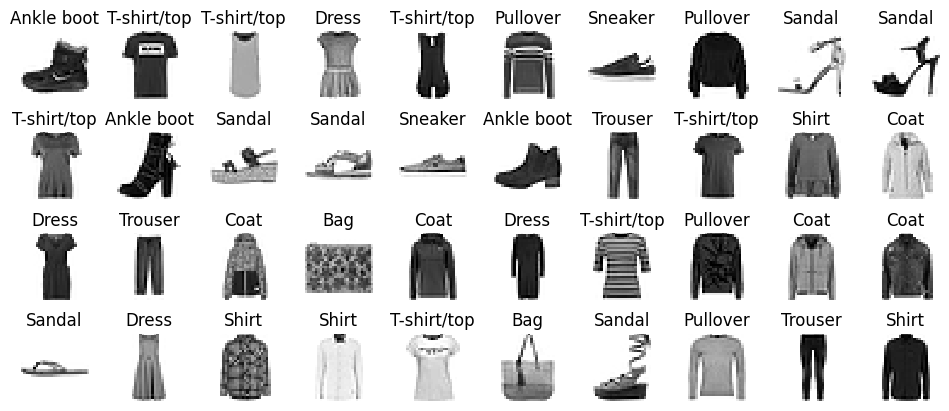

In [9]:


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

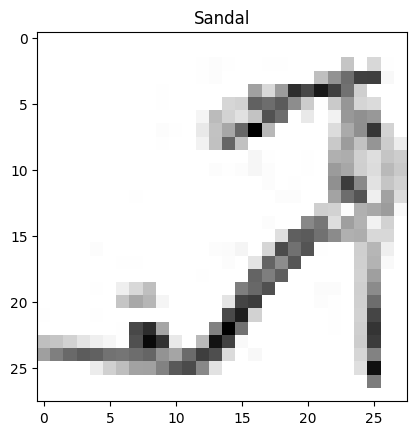

In [11]:
plt.imshow(X_train[8], cmap = "binary")
plt.title(class_names[y_train[8]])
plt.show()

In [ ]:
### Build a DNN

In [46]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
## Fill in the blank start a) ##
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
## Fill in the blank end a) ##
    tf.keras.layers.Dense(
        10, activation="softmax")
])

In [47]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 32)                4128      
                                                                 
 dense_18 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(
    ## Fill in the blank start c) ##
    # optimizer, Adam, SGD
    # loss function
    # metrics
    # callback functions
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
    ## Fill in the blank end c) ##
                  )

In [49]:
model.layers

In [50]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 32)                4128      
                                                                 
 dense_18 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


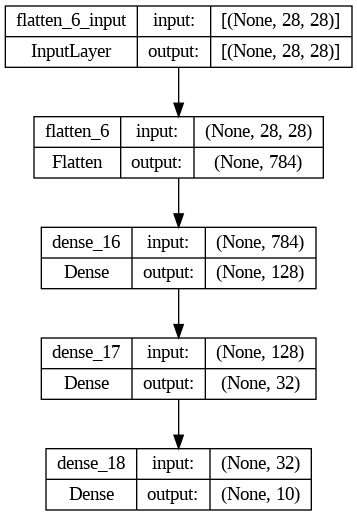

In [51]:
tf.keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [52]:
model.fit(
    ## Fill in the blank start d) ##
    X_train, y_train, epochs = 10
    ## Fill in the blank end d) ##
    )

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7884 - accuracy: 0.7316
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4993 - accuracy: 0.8265
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4528 - accuracy: 0.8408
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4256 - accuracy: 0.8514
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4064 - accuracy: 0.8573
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3902 - accuracy: 0.8630
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3776 - accuracy: 0.8666
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3655 - accuracy: 0.8718
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3566 - accuracy: 0.8735
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.346

In [53]:
#
model.evaluate(
    ## Fill in the blank start e) ##
    X_test, y_test
    ## Fill in the blank end e) ##
    )

313/313 [==============================] - 1s 2ms/step - loss: 0.4010 - accuracy: 0.8565


[0.4010013937950134, 0.8565000295639038]

In [ ]:
### Validation Split

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .1, random_state = 42)


In [55]:
another_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
## Fill in the blank start a) ##
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(64, activation = "relu"),
## Fill in the blank end a) ##
    tf.keras.layers.Dense(
        10, activation="softmax")
])

another_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               100480    
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Compile model
another_model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [59]:
# Train the model
history = another_model.fit(
    X_train,
    y_train,
    epochs = 20,
    validation_data = [X_val, y_val] # Passing validation data
    )

Epoch 1/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3696 - accuracy: 0.8693 - val_loss: 0.3949 - val_accuracy: 0.8607
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3596 - accuracy: 0.8724 - val_loss: 0.3700 - val_accuracy: 0.8693
Epoch 3/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3502 - accuracy: 0.8754 - val_loss: 0.3626 - val_accuracy: 0.8708
Epoch 4/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3421 - accuracy: 0.8781 - val_loss: 0.3768 - val_accuracy: 0.8643
Epoch 5/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3337 - accuracy: 0.8802 - val_loss: 0.4116 - val_accuracy: 0.8513
Epoch 6/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3268 - accuracy: 0.8811 - val_loss: 0.3455 - val_accuracy: 0.8800
Epoch 7/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3197 - accuracy: 0.8844 - val_loss: 0.3540 - val_accuracy:

In [63]:
history.history["val_loss"]

[0.39486438035964966,
 0.3700145184993744,
 0.36263158917427063,
 0.3767663538455963,
 0.41157296299934387,
 0.34553661942481995,
 0.35398831963539124,
 0.3443101942539215,
 0.3397836983203888,
 0.33661678433418274,
 0.33648815751075745,
 0.3287196755409241,
 0.32921186089515686,
 0.32478633522987366,
 0.3407207131385803,
 0.32707029581069946,
 0.3270917236804962,
 0.3269868791103363,
 0.36667728424072266,
 0.3161551356315613]

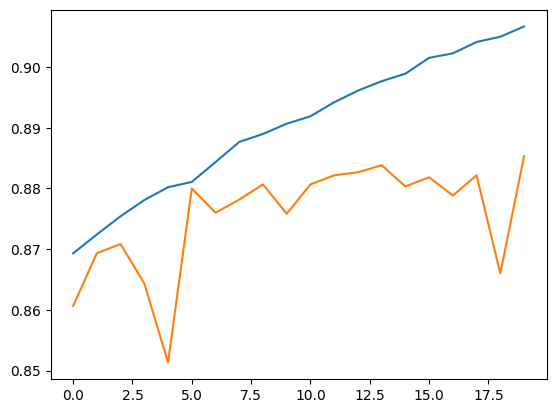

In [67]:
# plot the training history

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

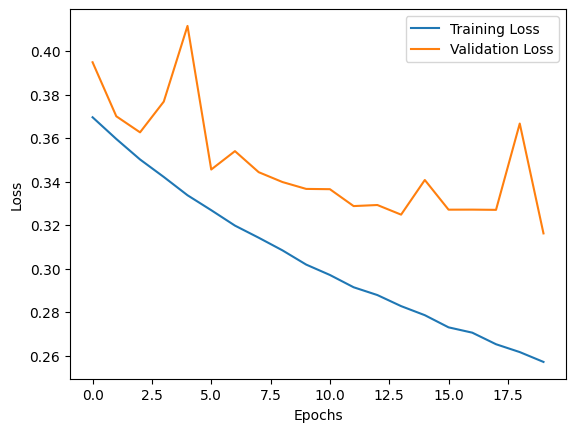

In [69]:
# plot the loss

plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [60]:
another_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8777


[0.3392552435398102, 0.8776999711990356]